In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# print datasets shape
print('shape of train data: {}, shape of test data:{}'.format(train.shape,test.shape))

shape of train data: (1460, 81), shape of test data:(1459, 80)


In [4]:
# explore train data
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
%matplotlib inline

In [9]:
# drop target column
target = train['SalePrice']
train.drop('SalePrice', axis =1,inplace=True)
print(train.shape)

(1460, 80)


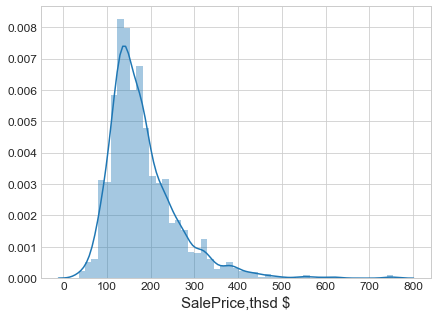

In [10]:
# target value distribution
sns.set_style('whitegrid');
plt.figure(figsize=(7,5))
sns.distplot(target/1000);
plt.xlabel(s='SalePrice,thsd $',size=15);
plt.xticks(size=12);
plt.yticks(size=12);

In [11]:
# concat train and test datasets
concat_data = pd.concat([train,test], axis = 0)
print(concat_data.shape)

(2919, 80)


In [37]:
# select categorical features
categorical = concat_data.select_dtypes(include =['object'])
numerical = concat_data.select_dtypes(exclude = ['object'] )
print(categorical.shape, numerical.shape)

(2919, 43) (2919, 37)


In [33]:
# label encoding
le = LabelEncoder()
categorical_le = categorical.astype('str').apply(le.fit_transform)

In [36]:
print(categorical_le.dtypes.value_counts())

int64    43
dtype: int64


In [58]:
# concat processing data and split by train and test
concat_data_le = pd.concat([numerical,categorical_le],axis=1)
concat_data_le.fillna(-999,inplace=True)
train_le = concat_data_le.iloc[train.index.values,]
test_le = concat_data_le.iloc[test.index.values,]
print(train_le.shape,test_le.shape)

(1460, 80) (1459, 80)


In [61]:
train_le.isnull().any().sum()

0

In [62]:
# train baseline model
rfr = RandomForestRegressor()
rfr.fit(train_le,target)
pred = rfr.predict(test_le)

In [68]:
submission_baseline = pd.read_csv('sample_submission.csv')

In [69]:
submission_baseline['SalePrice'] = pred

In [70]:
# make predictions 
submission_baseline.to_csv('baseline_rnd_f_regr.csv',index=False)